In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('k_means').getOrCreate()

In [0]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import * 
from pyspark.sql.types import *
from pyspark.sql.functions import rand, randn
from pyspark.ml.clustering import KMeans

In [0]:
df=spark.read.csv('/FileStore/tables/iris_dataset.csv',inferSchema=True,header=True)

In [0]:
print((df.count(),len(df.columns)))

(150, 5)

In [0]:
df.columns

Out[10]: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [0]:
df.printSchema()

root
-- sepal_length: double (nullable = true)
-- sepal_width: double (nullable = true)
-- petal_length: double (nullable = true)
-- petal_width: double (nullable = true)
-- species: string (nullable = true)

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [0]:
input_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [0]:
# Transform all features into a vector using VectorAssembler
vec_assembler = VectorAssembler(inputCols = input_cols, outputCol='features')
final_data = vec_assembler.transform(df)

In [0]:
display(final_data)

sepal_length,sepal_width,petal_length,petal_width,species,features
5.1,3.5,1.4,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(5.1, 3.5, 1.4, 0.2))"
4.9,3.0,1.4,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(4.9, 3.0, 1.4, 0.2))"
4.7,3.2,1.3,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(4.7, 3.2, 1.3, 0.2))"
4.6,3.1,1.5,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(4.6, 3.1, 1.5, 0.2))"
5.0,3.6,1.4,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(5.0, 3.6, 1.4, 0.2))"
5.4,3.9,1.7,0.4,setosa,"Map(vectorType -> dense, length -> 4, values -> List(5.4, 3.9, 1.7, 0.4))"
4.6,3.4,1.4,0.3,setosa,"Map(vectorType -> dense, length -> 4, values -> List(4.6, 3.4, 1.4, 0.3))"
5.0,3.4,1.5,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(5.0, 3.4, 1.5, 0.2))"
4.4,2.9,1.4,0.2,setosa,"Map(vectorType -> dense, length -> 4, values -> List(4.4, 2.9, 1.4, 0.2))"
4.9,3.1,1.5,0.1,setosa,"Map(vectorType -> dense, length -> 4, values -> List(4.9, 3.1, 1.5, 0.1))"


In [0]:
score=[]

for k in range(2,10):
    kmeans = KMeans(featuresCol='features',k=k)   
    
    model = kmeans.fit(final_data)
    # Make predictions
    predictions = model.transform(final_data)

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()

    silhouette = evaluator.evaluate(predictions)    

    score.append(silhouette)
    print("With K={}".format(k))
    print("silhouette = " + str(silhouette))
    print('--'*30)

With K=2
silhouette = 0.8501515983265806
------------------------------------------------------------
With K=3
silhouette = 0.7354567373091194
------------------------------------------------------------
With K=4
silhouette = 0.6766249818097015
------------------------------------------------------------
With K=5
silhouette = 0.6191763605196434
------------------------------------------------------------
With K=6
silhouette = 0.49698879837758025
------------------------------------------------------------
With K=7
silhouette = 0.638202710839034
------------------------------------------------------------
With K=8
silhouette = 0.6330648929174877
------------------------------------------------------------
With K=9
silhouette = 0.4821479480295215
------------------------------------------------------------

In [0]:
#Selecting k =2 for kmeans clustering
kmeans = KMeans(featuresCol='features',k=2)

In [0]:
model = kmeans.fit(final_data)

In [0]:
model.transform(final_data).groupBy('prediction').count().show()

+----------+-----+
prediction|count|
+----------+-----+
 1| 53|
 0| 97|
+----------+-----+

In [0]:
predictions=model.transform(final_data)

In [0]:
predictions.columns

Out[23]: ['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'features',
 'prediction']

In [0]:
predictions.groupBy('species','prediction').count().show()

+----------+----------+-----+
 species|prediction|count|
+----------+----------+-----+
 virginica| 0| 50|
versicolor| 1| 3|
versicolor| 0| 47|
 setosa| 1| 50|
+----------+----------+-----+

In [0]:
pandas_df = predictions.toPandas()
pandas_df.sample(5)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[25]:

,sepal_length,sepal_width,petal_length,petal_width,species,features,prediction
137,6.4,3.1,5.5,1.8,virginica,"[6.4, 3.1, 5.5, 1.8]",0
86,6.7,3.1,4.7,1.5,versicolor,"[6.7, 3.1, 4.7, 1.5]",0
65,6.7,3.1,4.4,1.4,versicolor,"[6.7, 3.1, 4.4, 1.4]",0
133,6.3,2.8,5.1,1.5,virginica,"[6.3, 2.8, 5.1, 1.5]",0
73,6.1,2.8,4.7,1.2,versicolor,"[6.1, 2.8, 4.7, 1.2]",0


In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

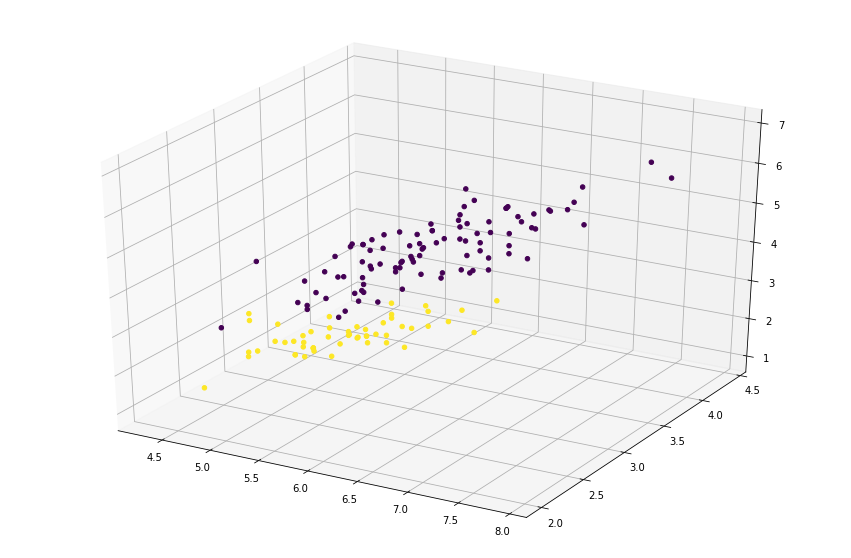

In [0]:
cluster_vis = plt.figure(figsize=(15,10)).gca(projection='3d')
cluster_vis.scatter(pandas_df.sepal_length, pandas_df.sepal_width, pandas_df.petal_length, c=pandas_df.prediction,depthshade=False)
plt.show()